<a href="https://colab.research.google.com/github/MudbariManzil/my-first-binder/blob/main/RegressionTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

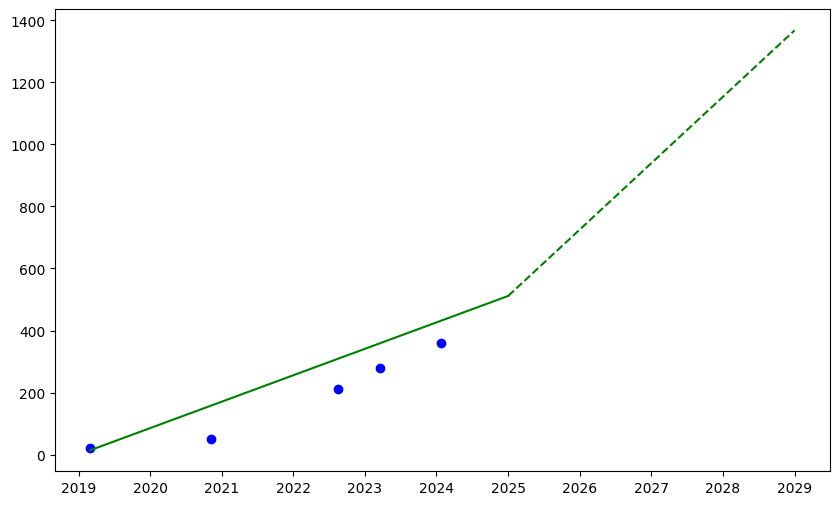

In [ ]:
# Re-import necessary libraries and setup the data again since the environment was reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime

# Dates and post-money valuations for Unlearn.AI
dates_unlearn = ['2019-03-01', '2020-11-05', '2022-08-16', '2023-03-21', '2024-01-25']
post_money_valuations = [20, 49, 210, 278, 360]  # in millions of USD

# Convert dates to numerical format (days since first date)
date_format = "%Y-%m-%d"
dates_unlearn = [datetime.strptime(date, date_format) for date in dates_unlearn]
days_since_start = [(date - dates_unlearn[0]).days for date in dates_unlearn]

# Prepare the data for polynomial regression (degree 2 for best fit curve)
X = np.array(days_since_start).reshape(-1, 1)
y = np.array(post_money_valuations)

# Polynomial regression setup (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict for the original and extended dates (for 2025 and 2029)
extended_dates = [datetime.strptime('2025-01-01', date_format), datetime.strptime('2029-01-01', date_format)]
extended_days = [(date - dates_unlearn[0]).days for date in extended_dates]
X_extended_poly = poly.transform(np.array(extended_days).reshape(-1, 1))
extended_valuations_poly = poly_model.predict(X_extended_poly)

# Plot the original data and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(dates_unlearn, post_money_valuations, color='blue', label='Post-money valuations')
# Plot the polynomial regression curve for the data points
X_line = np.linspace(min(days_since_start), max(days_since_start), 1000).reshape(-1, 1)
y_line = poly_model.predict(poly.transform(X_line))
plt.plot([dates_unlearn[0], datetime.strptime('2025-01-01', date_format)],
         [poly_model.predict(poly.transform([[0]]))[0], extended_valuations_poly[0]], color='green', label='Polynomial Best Fit Line')
plt.plot(extended_dates, extended_valuations_poly, color='green', linestyle='--', label='Extended Polynomial Best Fit Line')
plt.plot([dates_unlearn[0] + datetime.timedelta(days=day) for day in X_line.flatten()], y_line, color='green', label='Polynomial Curve')

# Annotate the projected valuations for 2025 and 2029
plt.annotate(f'2025: ${extended_valuations_poly[0]:,.2f}M', (extended_dates[0], extended_valuations_poly[0]),
             textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'2029: ${extended_valuations_poly[1]:,.2f}M', (extended_dates[1], extended_valuations_poly[1]),
             textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Post-Money Valuation Best Fit Projection (Polynomial Regression)')
plt.xlabel('Date')
plt.ylabel('Post-Money Valuation (in millions USD)')
plt.xticks(dates_unlearn + extended_dates, [datetime.strftime(date, '%b %d, %Y') for date in dates_unlearn + extended_dates], rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


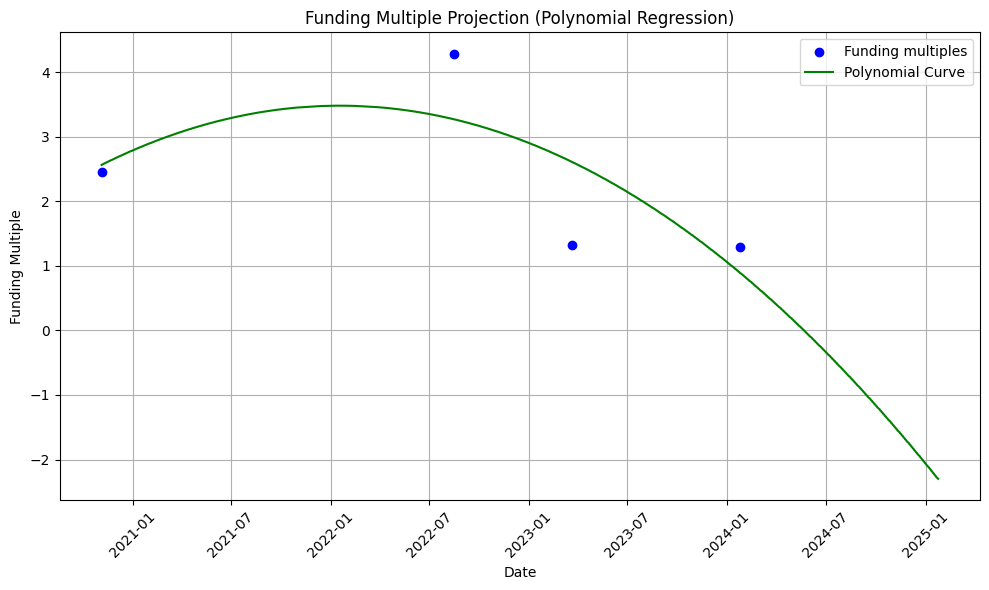

(-2.0602683676686033, -741.6966123606971)

In [ ]:
# Re-importing necessary libraries and setting up the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Dates and funding multiples
dates = ['2020-11-05', '2022-08-16', '2023-03-21', '2024-01-25']
multiples = [2.45, 4.29, 1.32, 1.29]

# Convert dates to numerical format (days since the first date)
date_format = "%Y-%m-%d"
dates = [datetime.strptime(date, date_format) for date in dates]
days_since_start = [(date - dates[0]).days for date in dates]

# Prepare the data for polynomial regression (degree 2 for best fit curve)
X = np.array(days_since_start).reshape(-1, 1)
y = np.array(multiples)

# Polynomial regression setup (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict next multiple (for simplicity, assume next date is Jan 2025)
next_day = (datetime.strptime('2025-01-01', date_format) - dates[0]).days  # projecting for 2025
predicted_multiple = poly_model.predict(poly.transform([[next_day]]))[0]

# Project valuation using the predicted multiple (assuming valuation for the next round is $360M * predicted multiple)
projected_valuation = 360 * predicted_multiple

# Plot the data and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(dates, multiples, color='blue', label='Funding multiples')

# Generate dates for the polynomial curve
X_line = np.linspace(min(days_since_start), max(days_since_start) + 365, 1000).reshape(-1, 1)  # Extend to 2025
y_line = poly_model.predict(poly.transform(X_line))
dates_line = [dates[0] + timedelta(days=int(day)) for day in X_line.flatten()]

plt.plot(dates_line, y_line, color='green', label='Polynomial Curve')

plt.title('Funding Multiple Projection (Polynomial Regression)')
plt.xlabel('Date')
plt.ylabel('Funding Multiple')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Output predicted multiple and projected valuation
predicted_multiple, projected_valuation



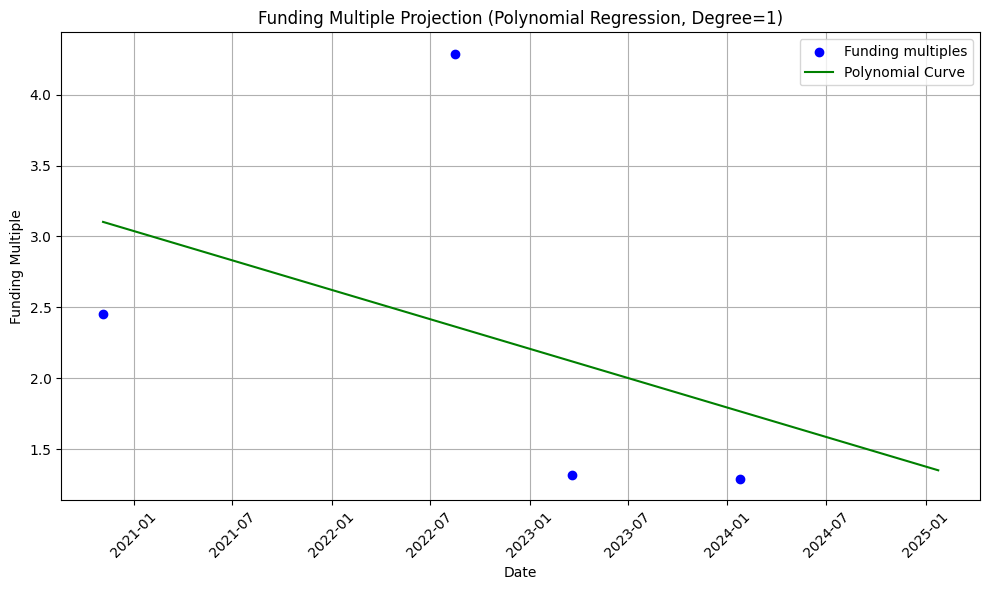

Predicted next funding multiple: 1.38
Projected valuation: $495.45M


In [ ]:
!pip install numpy scikit-learn matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import datetime

# Dates and funding multiples
dates = ['2020-11-05', '2022-08-16', '2023-03-21', '2024-01-25']
multiples = [2.45, 4.29, 1.32, 1.29]

# Convert dates to numerical format (days since the first date)
date_format = "%Y-%m-%d"
dates = [datetime.datetime.strptime(date, date_format) for date in dates]
days_since_start = [(date - dates[0]).days for date in dates]

# Prepare the data
X = np.array(days_since_start).reshape(-1, 1)
y = np.array(multiples)

# Find best polynomial degree with non-negative prediction
best_degree = 1
predicted_multiple = -1  # Initialize with a negative value

while predicted_multiple < 0:
    # Polynomial regression setup
    poly = PolynomialFeatures(degree=best_degree)
    X_poly = poly.fit_transform(X)

    # Fit the model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)

    # Predict next multiple (for simplicity, assume next date is Jan 2025)
    next_day = (datetime.datetime.strptime('2025-01-01', date_format) - dates[0]).days
    predicted_multiple = poly_model.predict(poly.transform([[next_day]]))[0]

    best_degree += 1  # Increment degree if prediction is negative

# Project valuation using the predicted multiple (assuming valuation for the next round is $360M * predicted multiple)
projected_valuation = 360 * predicted_multiple

# Plot the data and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(dates, multiples, color='blue', label='Funding multiples')

# Plot the polynomial regression curve
X_line = np.linspace(min(days_since_start), max(days_since_start) + 365, 1000).reshape(-1, 1)
y_line = poly_model.predict(poly.transform(X_line))
plt.plot([dates[0] + datetime.timedelta(days=day) for day in X_line.flatten()], y_line, color='green', label='Polynomial Curve')

plt.title(f'Funding Multiple Projection (Polynomial Regression, Degree={best_degree - 1})')
plt.xlabel('Date')
plt.ylabel('Funding Multiple')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Output predicted multiple and projected valuation
print(f"Predicted next funding multiple: {predicted_multiple:.2f}")
print(f"Projected valuation: ${projected_valuation:.2f}M")

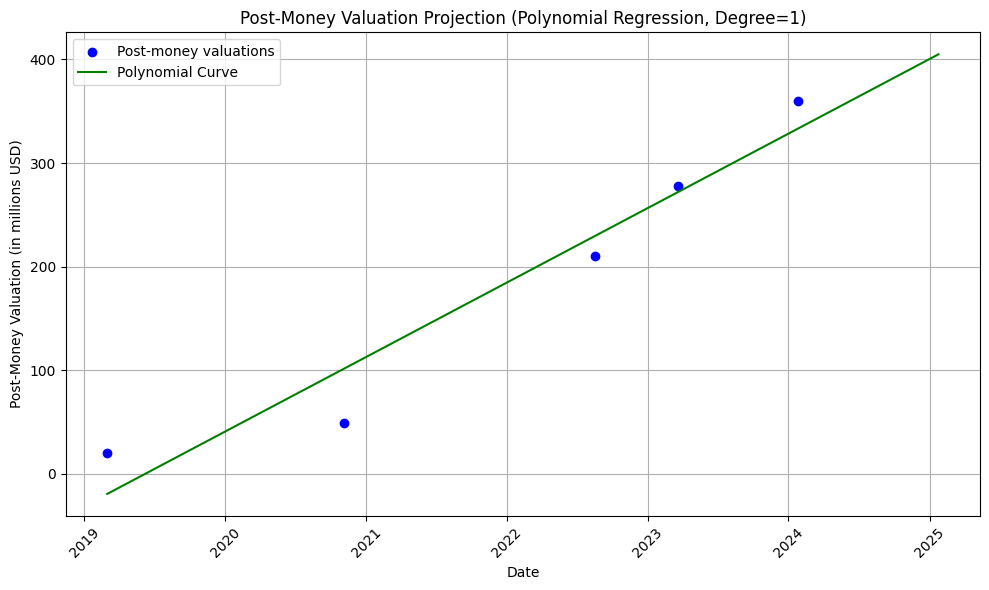

Projected next post-money valuation (Jan 2025): $400.38M


In [ ]:
!pip install numpy scikit-learn matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import datetime

# Dates and post-money valuations for Unlearn.AI
dates_unlearn = ['2019-03-01', '2020-11-05', '2022-08-16', '2023-03-21', '2024-01-25']
post_money_valuations = [20, 49, 210, 278, 360]  # in millions of USD

# Convert dates to numerical format (days since first date)
date_format = "%Y-%m-%d"
dates_unlearn = [datetime.datetime.strptime(date, date_format) for date in dates_unlearn]
days_since_start = [(date - dates_unlearn[0]).days for date in dates_unlearn]

# Prepare the data
X = np.array(days_since_start).reshape(-1, 1)
y = np.array(post_money_valuations)

# Find best polynomial degree with non-negative prediction
best_degree = 1
predicted_valuation = -1  # Initialize with a negative value

while predicted_valuation < 0:
    # Polynomial regression setup
    poly = PolynomialFeatures(degree=best_degree)
    X_poly = poly.fit_transform(X)

    # Fit the model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)

    # Predict next valuation (for simplicity, assume next date is Jan 2025)
    next_day = (datetime.datetime.strptime('2025-01-01', date_format) - dates_unlearn[0]).days
    predicted_valuation = poly_model.predict(poly.transform([[next_day]]))[0]

    best_degree += 1  # Increment degree if prediction is negative


# Plot the data and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(dates_unlearn, post_money_valuations, color='blue', label='Post-money valuations')

# Plot the polynomial regression curve
X_line = np.linspace(min(days_since_start), max(days_since_start) + 365, 1000).reshape(-1, 1)
y_line = poly_model.predict(poly.transform(X_line))
plt.plot([dates_unlearn[0] + datetime.timedelta(days=day) for day in X_line.flatten()], y_line, color='green', label='Polynomial Curve')

plt.title(f'Post-Money Valuation Projection (Polynomial Regression, Degree={best_degree - 1})')
plt.xlabel('Date')
plt.ylabel('Post-Money Valuation (in millions USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Output predicted valuation
print(f"Projected next post-money valuation (Jan 2025): ${predicted_valuation:.2f}M")


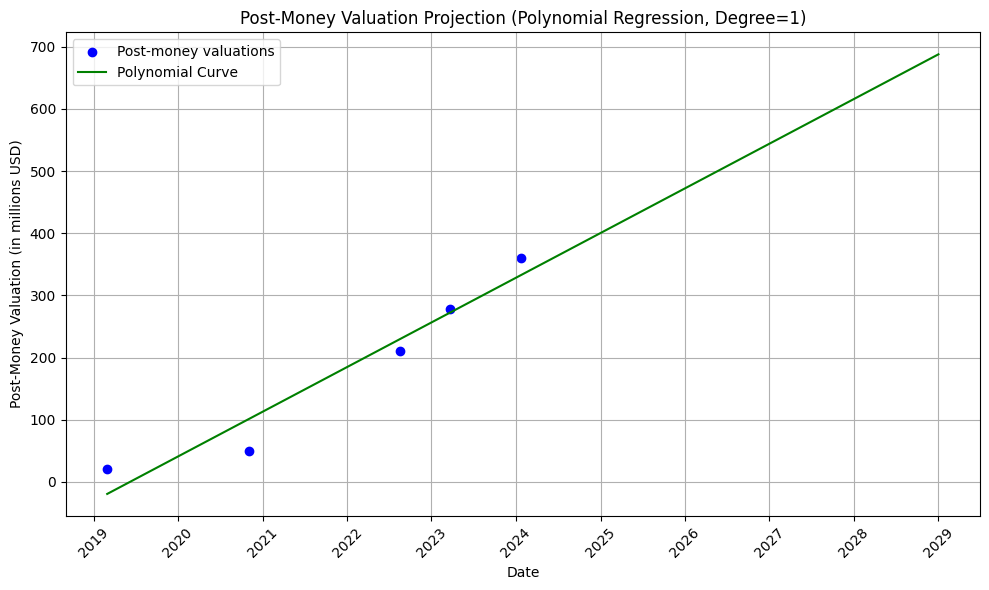

Projected post-money valuation (Jan 2029): $687.84M


In [ ]:
!pip install numpy scikit-learn matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import datetime

# Dates and post-money valuations for Unlearn.AI
dates_unlearn = ['2019-03-01', '2020-11-05', '2022-08-16', '2023-03-21', '2024-01-25']
post_money_valuations = [20, 49, 210, 278, 360]  # in millions of USD

# Convert dates to numerical format (days since first date)
date_format = "%Y-%m-%d"
dates_unlearn = [datetime.datetime.strptime(date, date_format) for date in dates_unlearn]
days_since_start = [(date - dates_unlearn[0]).days for date in dates_unlearn]

# Prepare the data
X = np.array(days_since_start).reshape(-1, 1)
y = np.array(post_money_valuations)

# Find best polynomial degree with non-negative prediction for 2029
best_degree = 1
predicted_valuation_2029 = -1  # Initialize with a negative value

while predicted_valuation_2029 < 0:
    # Polynomial regression setup
    poly = PolynomialFeatures(degree=best_degree)
    X_poly = poly.fit_transform(X)

    # Fit the model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)

    # Predict valuation for 2029
    next_day_2029 = (datetime.datetime.strptime('2029-01-01', date_format) - dates_unlearn[0]).days
    predicted_valuation_2029 = poly_model.predict(poly.transform([[next_day_2029]]))[0]

    best_degree += 1  # Increment degree if prediction is negative

# Plot the data and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(dates_unlearn, post_money_valuations, color='blue', label='Post-money valuations')

# Plot the polynomial regression curve
X_line = np.linspace(min(days_since_start), next_day_2029, 1000).reshape(-1, 1)  # Extend to 2029
y_line = poly_model.predict(poly.transform(X_line))
plt.plot([dates_unlearn[0] + datetime.timedelta(days=day) for day in X_line.flatten()], y_line, color='green', label='Polynomial Curve')

plt.title(f'Post-Money Valuation Projection (Polynomial Regression, Degree={best_degree - 1})')
plt.xlabel('Date')
plt.ylabel('Post-Money Valuation (in millions USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Output predicted valuation for 2029
print(f"Projected post-money valuation (Jan 2029): ${predicted_valuation_2029:.2f}M")

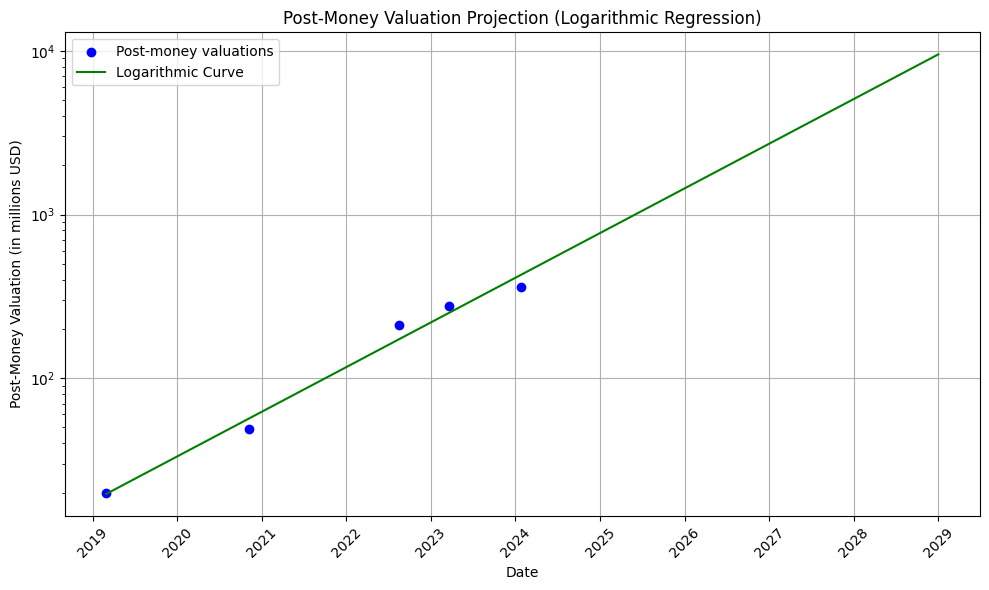

Projected post-money valuation (Jan 2029): $9527.67M


In [ ]:
!pip install numpy scikit-learn matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime

# Dates and post-money valuations for Unlearn.AI
dates_unlearn = ['2019-03-01', '2020-11-05', '2022-08-16', '2023-03-21', '2024-01-25']
post_money_valuations = [20, 49, 210, 278, 360]  # in millions of USD

# Convert dates to numerical format (days since first date)
date_format = "%Y-%m-%d"
dates_unlearn = [datetime.datetime.strptime(date, date_format) for date in dates_unlearn]
days_since_start = [(date - dates_unlearn[0]).days for date in dates_unlearn]

# Prepare the data
X = np.array(days_since_start).reshape(-1, 1)
y = np.log(post_money_valuations)  # Logarithmic transformation of valuations

# Fit the linear regression model
log_model = LinearRegression()
log_model.fit(X, y)

# Predict valuation for 2029
next_day_2029 = (datetime.datetime.strptime('2029-01-01', date_format) - dates_unlearn[0]).days
predicted_log_valuation_2029 = log_model.predict([[next_day_2029]])[0]
predicted_valuation_2029 = np.exp(predicted_log_valuation_2029)  # Exponentiate to get actual valuation

# Plot the data and the logarithmic curve
plt.figure(figsize=(10, 6))
plt.scatter(dates_unlearn, post_money_valuations, color='blue', label='Post-money valuations')

# Plot the logarithmic curve
X_line = np.linspace(min(days_since_start), next_day_2029, 1000).reshape(-1, 1)  # Extend to 2029
y_line = np.exp(log_model.predict(X_line))  # Exponentiate predictions for plotting
plt.plot([dates_unlearn[0] + datetime.timedelta(days=day) for day in X_line.flatten()], y_line, color='green', label='Logarithmic Curve')

plt.title('Post-Money Valuation Projection (Logarithmic Regression)')
plt.xlabel('Date')
plt.ylabel('Post-Money Valuation (in millions USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.yscale('log')  # Set y-axis to logarithmic scale

# Show the plot
plt.tight_layout()
plt.show()

# Output predicted valuation for 2029
print(f"Projected post-money valuation (Jan 2029): ${predicted_valuation_2029:.2f}M")